# Scalar data visualization in three dimensions

Most approaches for 3D visualization fall into one of the following categories [1]:

- Slicing techniques: Using a cut plane probe the data to extract a two-dimensional slice of the data, and then use a two-dimensional spatial data visualization methods.

- Isosurface techniques: Given a user-specified value, generate a (or several) surface description and visualize it using surface visualization techiniques.

- Direct volume rendering: Where an opacity function is assigned to values in the data, and you can see through it when rendered.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mayavi import mlab
import ipyvolume as ipv
from ipywidgets import interact
from IPython.display import display

In [2]:
%matplotlib notebook
mlab.init_notebook()
plt.style.use("../img/matplotlib.mplstyle")

Notebook initialized with x3d backend.


In [3]:
# Test data for the orbitals of a hydrogen atom
def hydrogen_wave(n=4, l=3, m=1,
                  limits=(-20, 20, -20, 20, -20, 20),
                  grid=(51, 51, 51)):
    """
    """
    from scipy.special import eval_genlaguerre, sph_harm, factorial
    from scipy import stats

    xmin, xmax, ymin, ymax, zmin, zmax = limits
    nx, ny, nz = grid
    X, Y, Z = np.mgrid[xmin:xmax:nx*1j,
                       ymin:ymax:ny*1j,
                       zmin:zmax:nz*1j]
    R = np.sqrt(X**2 + Y**2 + Z**2)
    Rmin = stats.scoreatpercentile(R.ravel(), 1)
    R[R < Rmin] = Rmin
    Phi = np.arccos(Z/R)
    Theta = np.arctan2(X, Y)
    Rho = 2*R/n
    norm = np.sqrt((2/n)**3 * factorial(n - l - 1)/(2*n*factorial(n + l)))
    Lag = eval_genlaguerre(n - l - 1, 2*l + 1, Rho)
    Sph = sph_harm(m, l, Theta, Phi)
    wave = norm * np.exp(-0.5*Rho) * Rho**l * Lag * Sph
    return X, Y, Z, wave

In [4]:
X, Y, Z, wave = hydrogen_wave()
prob_density = np.real(np.conjugate(wave) * wave)
phase = np.angle(wave)

## Slices

In [5]:
mlab.figure()
mlab.volume_slice(X, Y, Z, prob_density, colormap="viridis",
                  plane_orientation='x_axes')
mlab.volume_slice(X, Y, Z, prob_density, colormap="viridis",
                  plane_orientation='y_axes')
mlab.volume_slice(X, Y, Z, prob_density, colormap="viridis",
                  plane_orientation='z_axes')

## Isosurfaces

In [6]:
mlab.figure()
mlab.contour3d(X, Y, Z, prob_density,contours=[3e-5])

In [7]:
ipv.figure()
ipv.plot_isosurface(prob_density, color="blue",
                    extent=[[-20, 20], [-20, 20], [-20, 20]])
#ipv.save("hydrogen_isosurface.html") # We can save the html container
ipv.show()

Algthough, Matplotlib (itself) does not have the capabilities to do isosurfacing, we can
trick her to do it.

In [8]:
from skimage.measure import marching_cubes_lewiner as marching_cubes

In [9]:
verts, faces, _, _ = marching_cubes(prob_density, 3e-5, step_size=1)

<IPython.core.display.Javascript object>


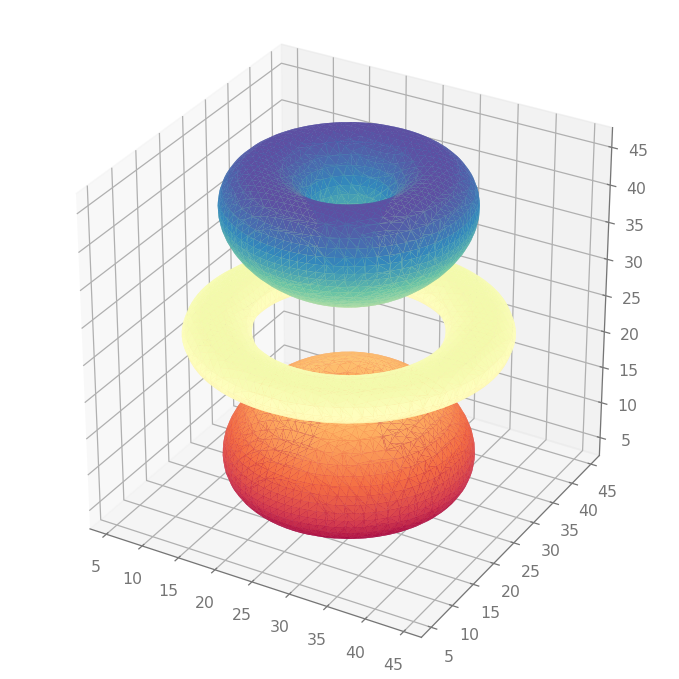

In [10]:
fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig)
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2],
                cmap='Spectral', lw=1)
plt.show();

We can use ipywidgets to interact with the selection of the isosurface value.

In [11]:
def matplotlib_iso(value=3e-5):
    verts, faces, _, _ = marching_cubes(prob_density, value, step_size=2)
    ax = plt.gca()
    ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2],
                    cmap='Spectral', lw=1)


<IPython.core.display.Javascript object>


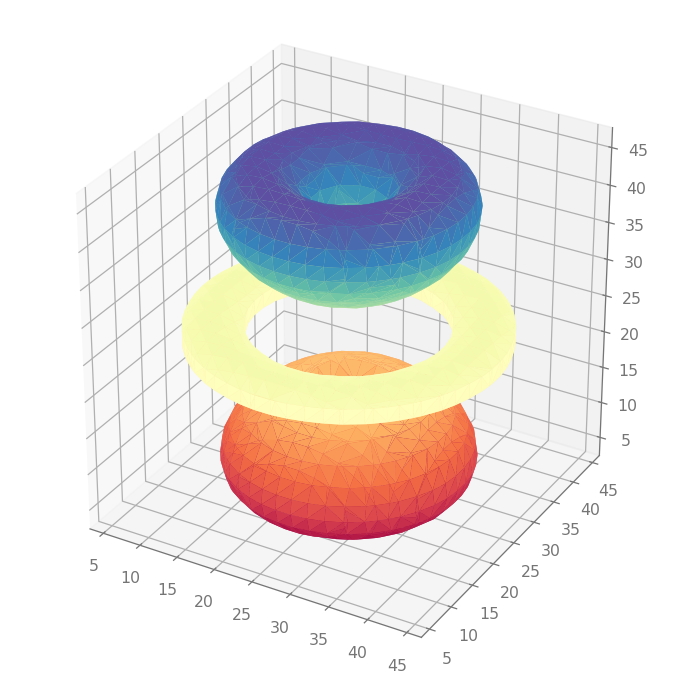

interactive(children=(FloatSlider(value=3e-05, description='value', max=7e-05, min=1e-08), Output()), _dom_cla…

In [12]:
fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig)
interact(matplotlib_iso,
         value=(1e-8, 7e-5));

## Volume rendering

In [13]:
ipv.figure()
ipv.volshow(prob_density, extent=[[-20, 20], [-20, 20], [-20, 20]])
ipv.show()

## Exercise


We want to visualize the dataset of a human head. Pick the technique (and package) that
you consider appropriate.

In [14]:
head_data = ipv.examples.head(draw=False)

## References

1. Matthew O. Ward, Georges Grinstein, Daniel Keim (2015). Interactive Data Visualization: Foundations, Techniques, and Applications. CRC Press.

In [15]:
# This cell stylize the notebook
from IPython.core.display import HTML
def css_styling():
    styles = open('./custom_barba.css', 'r').read()
    return HTML(styles)
css_styling()